<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Project 2: Customer Personality Analysis 

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

Understand the data, predict if the customer will get the product. 

Use Logistic Regression to make our prediction. 

- predict ['Response']

SVM/LogReg/

- Which feature is impt. 
- which X is most impt, find one solution/action for stakeholders. 
- rbf ... 

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from scipy import stats

# Cause plots to be displayed in the notebook:
%pylab inline
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.datasets import make_blobs

Populating the interactive namespace from numpy and matplotlib


## Taking a glance at the data

In [2]:
#Reading the file
#First 5 rows of data
data = pd.read_csv("marketing_campaign.csv", sep="\t")
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [3]:
print("Number of rows:", len(data))
print("Number of columns:", data.shape[1])
data.shape

Number of rows: 2240
Number of columns: 29


(2240, 29)

In [4]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [5]:
data.corr()

ID  Year_Birth    Income   Kidhome  Teenhome  \
ID                   1.000000    0.000028  0.013095  0.002406 -0.002580   
Year_Birth           0.000028    1.000000 -0.161791  0.230176 -0.352111   
Income               0.013095   -0.161791  1.000000 -0.428669  0.019133   
Kidhome              0.002406    0.230176 -0.428669  1.000000 -0.036133   
Teenhome            -0.002580   -0.352111  0.019133 -0.036133  1.000000   
Recency             -0.046524   -0.019871 -0.003970  0.008827  0.016198   
MntWines            -0.022878   -0.157773  0.578650 -0.496297  0.004846   
MntFruits            0.004600   -0.017917  0.430842 -0.372581 -0.176764   
MntMeatProducts     -0.004437   -0.030872  0.584633 -0.437129 -0.261160   
MntFishProducts     -0.024475   -0.041625  0.438871 -0.387644 -0.204187   
MntSweetProducts    -0.007642   -0.018133  0.440744 -0.370673 -0.162475   
MntGoldProds        -0.013438   -0.061818  0.325916 -0.349595 -0.021725   
NumDealsPurchases   -0.037166   -0.060846 -0.083101  0.221798  0.387741   
NumWebPurchases     -0.018924   -0.145040  0.387878 -0.361647  0.155500   
NumCatalogPurchases -0.003440   -0.121275  0.589162 -0.502237 -0.110769   
NumStorePurchases   -0.014927   -0.128272  0.529362 -0.499683  0.050695   
NumWebVisitsMonth   -0.007446    0.121139 -0.553088  0.447846  0.134884   
AcceptedCmp3        -0.036040    0.061774 -0.016174  0.014674 -0.042677   
AcceptedCmp4        -0.025387   -0.060510  0.184400 -0.161600  0.038886   
AcceptedCmp5        -0.007517    0.007123  0.335943 -0.205634 -0.191050   
AcceptedCmp1        -0.021614   -0.005930  0.276820 -0.172339 -0.140090   
AcceptedCmp2        -0.015061   -0.006539  0.087545 -0.081716 -0.015605   
Complain             0.033883   -0.030128 -0.027225  0.040207  0.003138   
Z_CostContact             NaN         NaN       NaN       NaN       NaN   
Z_Revenue                 NaN         NaN       NaN       NaN       NaN   
Response            -0.021968    0.021325  0.133047 -0.080008 -0.154446   

                      Recency  MntWines  MntFruits  MntMeatProducts  \
ID                  -0.046524 -0.022878   0.004600        -0.004437   
Year_Birth          -0.019871 -0.157773  -0.017917        -0.030872   
Income              -0.003970  0.578650   0.430842         0.584633   
Kidhome              0.008827 -0.496297  -0.372581        -0.437129   
Teenhome             0.016198  0.004846  -0.176764        -0.261160   
Recency              1.000000  0.016064  -0.004306         0.023056   
MntWines             0.016064  1.000000   0.389637         0.562667   
MntFruits           -0.004306  0.389637   1.000000         0.543105   
MntMeatProducts      0.023056  0.562667   0.543105         1.000000   
MntFishProducts      0.001079  0.399753   0.594804         0.568402   
MntSweetProducts     0.022670  0.386581   0.567164         0.523846   
MntGoldProds         0.016693  0.387516   0.392995         0.350609   
NumDealsPurchases   -0.001098  0.010940  -0.132114        -0.122415   
NumWebPurchases     -0.010726  0.542265   0.296735         0.293761   
NumCatalogPurchases  0.025110  0.635226   0.487917         0.723827   
NumStorePurchases    0.000799  0.642100   0.461758         0.479659   
NumWebVisitsMonth   -0.021445 -0.320653  -0.418383        -0.539470   
AcceptedCmp3        -0.032991  0.062202   0.014727         0.018272   
AcceptedCmp4         0.018826  0.373286   0.010152         0.102912   
AcceptedCmp5         0.000129  0.472613   0.215833         0.373769   
AcceptedCmp1        -0.019283  0.354133   0.194748         0.309761   
AcceptedCmp2        -0.001781  0.205907  -0.009773         0.043033   
Complain             0.013231 -0.039007  -0.005166        -0.023483   
Z_CostContact             NaN       NaN        NaN              NaN   
Z_Revenue                 NaN       NaN        NaN              NaN   
Response            -0.198437  0.247254   0.125289         0.236335   

                     MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  \
ID   

## Data cleanning

In [6]:
# The Income column has 24 missing values.
# The Dt_Customer column (date of customer's enrollment with the company) was parsed as Object.
# We need to encode Education and Marital_Status column in the data frame since it has categorical features.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
#Extracting the uniq_data for each Variables 
#We will be focus looking at "Response" column. 

for uniq_data in data:
    print(uniq_data)
    values, counts = np.unique(data[uniq_data], return_counts=True)
    print(values)
    print(counts)
    
for uniq_data in data.columns:
    print(uniq_data)
    data[uniq_data].unique()
    print(np.sort(data[uniq_data].unique()))

ID
[    0     1     9 ... 11187 11188 11191]
[1 1 1 ... 1 1 1]
Year_Birth
[1893 1899 1900 1940 1941 1943 1944 1945 1946 1947 1948 1949 1950 1951
 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965
 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979
 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996]
[ 1  1  1  1  1  7  7  8 16 16 21 30 29 43 52 35 50 49 55 43 53 51 49 36
 44 45 42 74 50 44 51 71 77 87 79 74 69 83 89 52 77 53 39 39 45 42 38 32
 42 27 29 30 18 15 13  5  3  5  2]
Education
['2n Cycle' 'Basic' 'Graduation' 'Master' 'PhD']
[ 203   54 1127  370  486]
Marital_Status
['Absurd' 'Alone' 'Divorced' 'Married' 'Single' 'Together' 'Widow' 'YOLO']
[  2   3 232 864 480 580  77   2]
Income
[1730. 2447. 3502. ...   nan   nan   nan]
[1 1 1 ... 1 1 1]
Kidhome
[0 1 2]
[1293  899   48]
Teenhome
[0 1 2]
[1158 1030   52]
Dt_Customer
['01-01-2013' '01-01-2014' '01-02-2013' '01-02-2014' '01-03-2013'
 '01-03-2014' '01-04-2

### Eliminate NULL values 

In [8]:
data = data.dropna()
print("The shape of the dataset after removing null values is : ", data.shape)

The shape of the dataset after removing null values is :  (2216, 29)


### Create Age Column

In [9]:
data['Age'] = 2021 - data['Year_Birth']
data['Age'].head()

0    64
1    67
2    56
3    37
4    40
Name: Age, dtype: int64

In [10]:
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  AcceptedCmp4  \
0  04-09-2012       58       635  ...             0             0   
1  08-03-2014       38        11  ...             0             0   
2  21-08-2013       26       426  ...             0             0   
3  10-02-2014       26        11  ...             0             0   
4  19-01-2014       94       173  ...             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
0             0             0             0         0              3   
1             0             0             0         0              3   
2             0             0             0         0              3   
3             0             0             0         0              3   
4             0             0             0         0              3   

   Z_Revenue  Response  Age  
0         11         1   64  
1         11         0   67  
2         11         0   56  
3         11         0   37  
4         11         0   40  

[5 rows x 30 columns]

In [11]:
data.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2216.000000  2216.000000    2216.000000  2216.000000  2216.000000   
mean    5588.353339  1968.820397   52247.251354     0.441787     0.505415   
std     3249.376275    11.985554   25173.076661     0.536896     0.544181   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2814.750000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8421.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2216.000000  2216.000000  2216.000000      2216.000000   
mean     49.012635   305.091606    26.356047       166.995939   
std      28.948352   337.327920    39.793917       224.283273   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    24.000000     2.000000        16.000000   
50%      49.000000   174.500000     8.000000        68.000000   
75%      74.000000   505.000000    33.000000       232.250000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count      2216.000000  ...   2216.000000   2216.000000   2216.000000   
mean         37.637635  ...      0.073556      0.074007      0.073105   
std          54.752082  ...      0.261106      0.261842      0.260367   
min           0.000000  ...      0.000000      0.000000      0.000000   
25%           3.000000  ...      0.000000      0.000000      0.000000   
50%          12.000000  ...      0.000000      0.000000      0.000000   
75%          50.000000  ...      0.000000      0.000000      0.000000   
max         259.000000  ...      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  Z_Revenue  \
count   2216.000000   2216.000000  2216.000000         2216.0     2216.0   
mean       0.064079      0.013538     0.009477            3.0       11.0   
std        0.244950      0.115588     0.096907            0.0        0.0   
min        0.000000      0.000000     0.000000            3.0       11.0   
25%        0.000000      0.000000     0.000000            3.0       11.0   
50%        0.000000      0.000000     0.000000            3.0       11.0   
75%        0.000000      0.000000     0.000000            3.0       11.0   
max        1.000000      1.000000     1.000000            3.0       11.0   

          Response          Age  
count  2216.000000  2216.000000  
mean      0.150271    52.179603  
std       0.357417    11.985554  
min       0.000000    25.000000  
25%       0.000000    44.000000  
50%       0.000000    51.000000  
75%       0.000000    62.000000  
max       1.000000   128.000000  

[8 rows x 27 columns]

In [12]:
data.Age.max()

128

In [13]:
data.Age.min()

25

### Parsing OBJECT as DATETIME

In [14]:
print("Data type of Dt_Customer column before parsing : ", data["Dt_Customer"].dtypes)
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
print("Data type of Dt_Customer column after parsing : ", data["Dt_Customer"].dtypes)
print(data["Dt_Customer"].head())

Data type of Dt_Customer column before parsing :  object
Data type of Dt_Customer column after parsing :  datetime64[ns]
0   2012-04-09
1   2014-08-03
2   2013-08-21
3   2014-10-02
4   2014-01-19
Name: Dt_Customer, dtype: datetime64[ns]


### Encode 'Education' & 'Marital_Status' Column

In [15]:
data.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [16]:
data.Marital_Status.unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [17]:
data['Education'].\
replace({'Graduation' : 1, 'PhD' : 2, 'Master' : 3, 'Basic' : 4, '2n Cycle' : 5},
        inplace=True)

In [18]:
data['Marital_Status'].\
replace({'Single' : 0, 'Together' : 1, 'Married' : 2, 'Divorced' : 3, 'Widow' : 4, 'Alone' : 5,
       'Absurd' : 6, 'YOLO' : 7},
       inplace=True)

In [19]:
data.head()

ID  Year_Birth  Education  Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957          1               0  58138.0        0         0   
1  2174        1954          1               0  46344.0        1         1   
2  4141        1965          1               1  71613.0        0         0   
3  6182        1984          1               1  26646.0        1         0   
4  5324        1981          2               2  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  AcceptedCmp4  \
0  2012-04-09       58       635  ...             0             0   
1  2014-08-03       38        11  ...             0             0   
2  2013-08-21       26       426  ...             0             0   
3  2014-10-02       26        11  ...             0             0   
4  2014-01-19       94       173  ...             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
0             0             0             0         0              3   
1             0             0             0         0              3   
2             0             0             0         0              3   
3             0             0             0         0              3   
4             0             0             0         0              3   

   Z_Revenue  Response  Age  
0         11         1   64  
1         11         0   67  
2         11         0   56  
3         11         0   37  
4         11         0   40  

[5 rows x 30 columns]

In [20]:
data.dtypes

ID                              int64
Year_Birth                      int64
Education                       int64
Marital_Status                  int64
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [21]:
data1 = data.drop(columns=['Dt_Customer'])

In [22]:
data1.head()

ID  Year_Birth  Education  Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957          1               0  58138.0        0         0   
1  2174        1954          1               0  46344.0        1         1   
2  4141        1965          1               1  71613.0        0         0   
3  6182        1984          1               1  26646.0        1         0   
4  5324        1981          2               2  58293.0        1         0   

   Recency  MntWines  MntFruits  ...  AcceptedCmp3  AcceptedCmp4  \
0       58       635         88  ...             0             0   
1       38        11          1  ...             0             0   
2       26       426         49  ...             0             0   
3       26        11          4  ...             0             0   
4       94       173         43  ...             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
0             0             0             0         0              3   
1             0             0             0         0              3   
2             0             0             0         0              3   
3             0             0             0         0              3   
4             0             0             0         0              3   

   Z_Revenue  Response  Age  
0         11         1   64  
1         11         0   67  
2         11         0   56  
3         11         0   37  
4         11         0   40  

[5 rows x 29 columns]

In [23]:
data1['Response'].value_counts()

0    1883
1     333
Name: Response, dtype: int64

## Logistic Regression Model

Use Logistic Regression and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

In [24]:
data1.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age'],
      dtype='object')

In [25]:
feat = [x for x in data1.columns if x != 'Response']

In [26]:
y = data1['Response']
x = data1[feat]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 1)

In [28]:
logreg = LogisticRegression()

In [29]:
logreg.fit(X_train, y_train)

/Users/anna_hj/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
logreg.coef_

array([[-8.91488794e-06, -3.43801657e-04, -1.20406877e-04,
        -2.39055216e-04, -1.78286095e-05,  1.70187604e-04,
        -2.69179020e-04, -2.58636267e-02,  1.70928731e-03,
        -1.84734280e-03,  2.99349838e-03, -4.06907084e-03,
         1.13738530e-03,  3.16651884e-03,  3.66320087e-04,
         6.60511227e-04,  4.28815654e-04, -1.82412822e-03,
         1.30779581e-03,  3.15329816e-04,  1.65254758e-04,
         2.45788050e-04,  2.55231434e-04,  8.03394011e-05,
         5.86486666e-06, -4.63720721e-06, -1.70030931e-05,
        -2.78013027e-03]])

In [31]:
logreg.intercept_

array([-1.54574223e-06])

In [32]:
logreg.score(X_train,y_train)

0.8495788206979543

In [33]:
logreg.score(X_test,y_test)

0.868231046931408

In [34]:
from sklearn import metrics
y_pred_class = logreg.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[467  10]
 [ 63  14]]


In [35]:
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

[['TN' 'FP']
 ['FN' 'TP']]


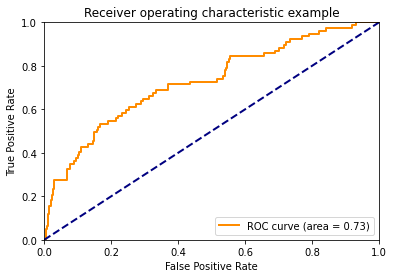

In [36]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = logreg.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

# Naive Bayes
## Use Naive Bayes

Use Naive Bayes and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

In [37]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 1)

In [38]:
gnb.fit(X_train, y_train)

GaussianNB()

In [40]:
y_pred = gnb.predict(X_test)

In [41]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7906137184115524
